# Question1: Enron Analysis

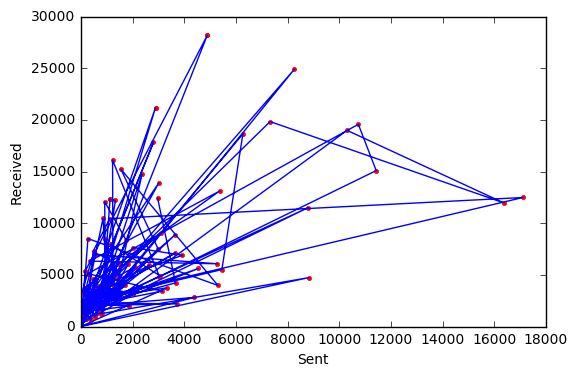

In [3]:
import os
import glob,codecs
import csv
import math
from math import exp
import matplotlib.pyplot as plt
#import urllib2
#import re
from email.parser import HeaderParser
#from smtplib import SMTPException
relative_path='/Users/Sneha/Downloads/maildir'
enron_files = [ef for ef in os.listdir(relative_path)]
#print(enron_files)
global count_mails
count_mails=0
sent_dict={}
recv_dict={}
last_names=[]
x=[]
y=[]
parser = HeaderParser()
for a in enron_files:
    last_n= a.split('-')
    last_names.append(last_n[0])

def check_file_or_dir(f,case):
    global count_mails
    if os.path.isdir(f):
        #print ("i am a directory", f)
        dir_path=[p for p in os.listdir(f)]
        for w in dir_path:
            if w!='.DS_Store':
                new_files=f+'/'+w
                check_file_or_dir(new_files,case)
    else:
        if case==1:
            with codecs.open(f, "r",encoding='utf-8', errors='ignore') as fdata:
                b=fdata.read()
                h = parser.parsestr(b)
                headers= h.items()
                for z in headers:
                    head,value=z
                    if head=='Date':
                        if value.find('Dec 2001')!=-1:
                            count_mails=count_mails+1
        if case==2:
            with codecs.open(f, "r",encoding='utf-8', errors='ignore') as fdata:
                b=fdata.read()
                h = parser.parsestr(b)
                headers= h.items()
                for z in headers:
                    head,value=z
                    if head=='From':
                        From=value
                        for l in last_names:
                            if l in From:
                                if l not in sent_dict:
                                    sent_dict[l]=1
                                else:
                                    c=sent_dict[l]
                                    sent_dict[l]=c+1
                            
                    if head=='To':
                        To=value
                        for l in last_names:
                                if l in To:
                                    if l not in recv_dict:
                                        recv_dict[l]=1
                                    else:
                                        c=recv_dict[l]
                                        recv_dict[l]=c+1
        #if case==3:
                        
for i in enron_files:
    if i!='.DS_Store':
        folder_path=relative_path+'/'+i
        inside_folder=[f for f in os.listdir(folder_path)]
        #print (inside_folder)
        for j in inside_folder:
            files=folder_path+'/'+j
            check_file_or_dir(files,1)
        for j in inside_folder:
            files=folder_path+'/'+j
            check_file_or_dir(files,2)
        #for j in inside_folder:
            #files=folder_path+'/'+j
            #check_file_or_dir(files,3)
#print (count_mails)#For first case
#print (len(sent_dict),sent_dict)
'''csvfile=open('enron_file.csv', 'a')
title='Last_name'+','+'Sent'+','+'Recieved'+'\n'
csvfile.write(title)
for a in last_names:
    if a in sent_dict:
        sent_name=sent_dict[a]
    else:
        sent_name=0
    if a in recv_dict:
        recv_name=recv_dict[a]
    else:
        recv_name=0
    txt=str(a)+','+str(sent_name)+','+str(recv_name)+'\n'
    #print(txt)
    #text1=txt(a,sent_name,recv_name)
    csvfile.write(txt)
#if os.path.isfile('/Users/Sneha/enron_file.csv'):
#    os.remove('/Users/Sneha/enron_file.csv')
'''
if os.path.isfile('/Users/Sneha/output_enron_file.csv'):
    os.remove('/Users/Sneha/output_enron_file.csv')
for a in last_names:
    if a!='.DS_Store':
        if a in sent_dict:
            sent_mail=sent_dict[a]
        else:
            sent_mail=0
        if a in recv_dict:
            recv_mail=recv_dict[a]
        else:
            recv_mail=0
        g=float(sent_mail)
        x.append(g)
        h=float(recv_mail)
        y.append(h)
    with open("output_enron_file.csv",'a') as result:
        if a!='.DS_Store':
            
                #title=['Last_name','Sent','Recieved']
            wr=csv.writer(result, dialect='excel')
                #wr.writerow(title)
            row_enron=[a,sent_mail,recv_mail]
            wr.writerow(row_enron)
            
        #with open("output_enron_file.csv",'a') as result:
plt.plot(x,y,'r.',x,y,'b.')#Plotting the log(freq) vs log(count)
plt.xlabel('Sent')
plt.ylabel('Received')
plt.show()            
            
    